In [284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re, string
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

import warnings
warnings.filterwarnings('ignore')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\peric\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\peric\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\peric\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [285]:
# SP_STOP = set(stopwords.words('spanish'))
verde_si = '#2E8B57'
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=[verde_si])
sns.set_style('whitegrid')

In [286]:
df = pd.read_csv("comments.csv")

In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4079 entries, 0 to 4078
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   post_id              4079 non-null   int64  
 1   comment_id           4079 non-null   int64  
 2   username             0 non-null      float64
 3   comment_text         4076 non-null   object 
 4   like_count           4079 non-null   int64  
 5   timestamp            4079 non-null   object 
 6   post_caption         4079 non-null   object 
 7   post_time            4079 non-null   object 
 8   post_alt_text        0 non-null      float64
 9   post_comments_count  4079 non-null   int64  
 10  post_likes           4079 non-null   int64  
 11  post_media_type      4079 non-null   object 
 12  post_media_url       4058 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 414.4+ KB


In [288]:
df.drop(columns=["username", "post_alt_text"], inplace=True)

In [289]:
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Longitudes del comentario
df['char_len']  = df['comment_text'].str.len()
df['word_len']  = df['comment_text'].str.split().str.len()
df['char_len_caption']  = df['post_caption'].str.len()
df['word_len_caption']  = df['post_caption'].str.split().str.len()

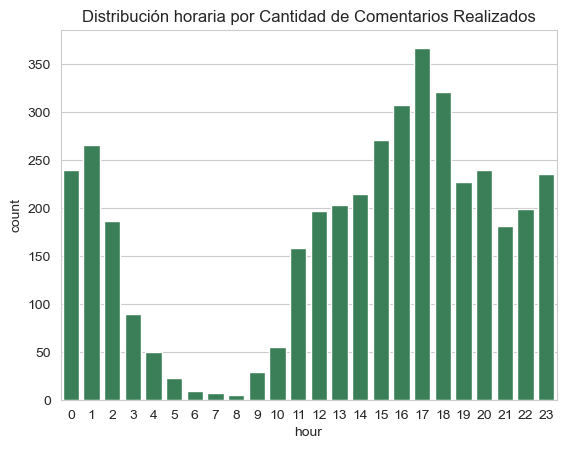

In [290]:
df['hour'] = df['timestamp'].dt.hour
sns.countplot(data=df, x='hour')
plt.title('Distribución horaria por Cantidad de Comentarios Realizados')
plt.show()

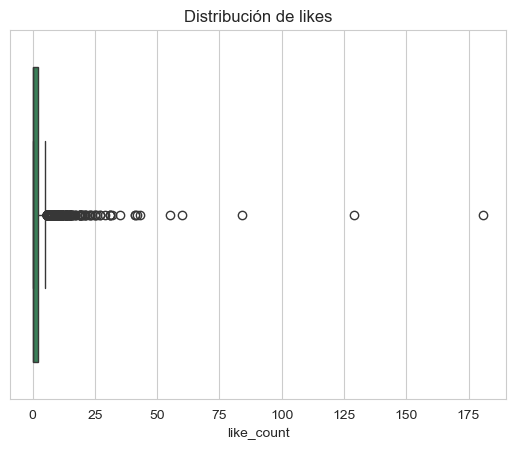

,count,mean,sum
comment_id,,,
18056649299012754,1,181.0,181
18053147234134132,1,129.0,129
18033172172263363,1,84.0,84
17938554731967564,1,60.0,60
18125791801414371,1,55.0,55


In [291]:
sns.boxplot(data=df, x='like_count')
plt.title('Distribución de likes')
plt.show()

likes_post = (df.groupby('comment_id')['like_count']
                .agg(['count', 'mean', 'sum'])
                .sort_values('sum', ascending=False))
likes_post.head()

In [292]:
df.query("like_count > 50") # Se ve que los comentarios con mayores likes son para homenajear

,post_id,comment_id,comment_text,like_count,timestamp,post_caption,post_time,post_comments_count,post_likes,post_media_type,post_media_url,char_len,word_len,char_len_caption,word_len_caption,hour
2803,18493669975008278,18056649299012754,Anécdota inolvidable...... 10 de Agosto 2001 d...,181,2025-02-17 12:55:06+00:00,"A 16 años de su partida, rendimos homenaje a A...",2025-02-17T11:26:51+0000,445,5313,IMAGE,https://scontent.cdninstagram.com/v/t51.75761-...,705.0,126.0,516,92,12
2835,18493669975008278,17938554731967564,"Cómo siempre que nos cruzamos charlabamos, el ...",60,2025-02-17 12:32:08+00:00,"A 16 años de su partida, rendimos homenaje a A...",2025-02-17T11:26:51+0000,445,5313,IMAGE,https://scontent.cdninstagram.com/v/t51.75761-...,267.0,46.0,516,92,12
2896,18493669975008278,18033172172263363,Teníamos que hacer una fotonovela para el cole...,84,2025-02-17 11:51:10+00:00,"A 16 años de su partida, rendimos homenaje a A...",2025-02-17T11:26:51+0000,445,5313,IMAGE,https://scontent.cdninstagram.com/v/t51.75761-...,174.0,31.0,516,92,11
2924,18493669975008278,18053147234134132,"Si le preguntabas dónde quedaba ""el banco..."" ...",129,2025-02-17 11:36:22+00:00,"A 16 años de su partida, rendimos homenaje a A...",2025-02-17T11:26:51+0000,445,5313,IMAGE,https://scontent.cdninstagram.com/v/t51.75761-...,95.0,17.0,516,92,11
2925,18493669975008278,18125791801414371,Siempre con una sonrisa te saludaba amablement...,55,2025-02-17 11:36:00+00:00,"A 16 años de su partida, rendimos homenaje a A...",2025-02-17T11:26:51+0000,445,5313,IMAGE,https://scontent.cdninstagram.com/v/t51.75761-...,162.0,26.0,516,92,11


In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4079 entries, 0 to 4078
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   post_id              4079 non-null   int64              
 1   comment_id           4079 non-null   int64              
 2   comment_text         4076 non-null   object             
 3   like_count           4079 non-null   int64              
 4   timestamp            4079 non-null   datetime64[ns, UTC]
 5   post_caption         4079 non-null   object             
 6   post_time            4079 non-null   object             
 7   post_comments_count  4079 non-null   int64              
 8   post_likes           4079 non-null   int64              
 9   post_media_type      4079 non-null   object             
 10  post_media_url       4058 non-null   object             
 11  char_len             4076 non-null   float64            
 12  word_len            

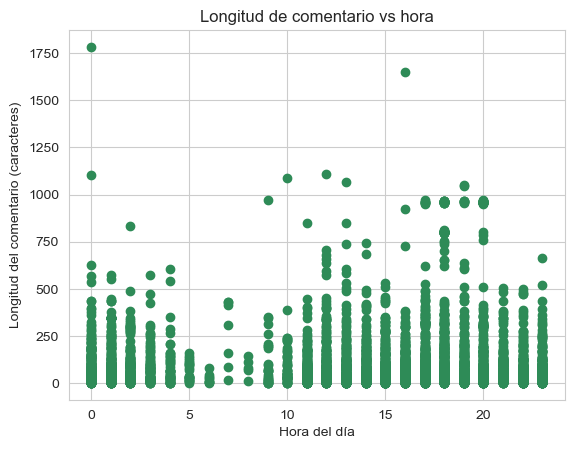

In [294]:
# 2. Relación: longitud de comentario (caracteres) vs hora
plt.figure()
plt.scatter(df['hour'], df['char_len'])
plt.xlabel('Hora del día')
plt.ylabel('Longitud del comentario (caracteres)')
plt.title('Longitud de comentario vs hora')
plt.show()

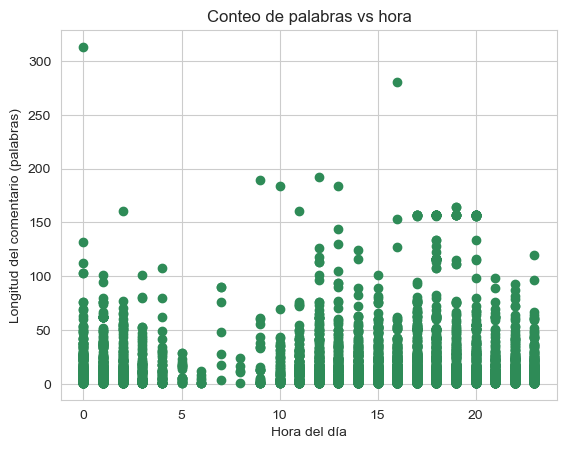

In [295]:
# 3. Relación: longitud de comentario (palabras) vs hora
plt.figure()
plt.scatter(df['hour'], df['word_len'])
plt.xlabel('Hora del día')
plt.ylabel('Longitud del comentario (palabras)')
plt.title('Conteo de palabras vs hora')
plt.show()

In [296]:
# 4. Agregar y agrupar por post para analizar caption
posts = (
    df
    .groupby('post_id')
    .agg(
        comment_count=('comment_id', 'count'),
        char_len_caption=('char_len_caption', 'first'),
        word_len_caption=('word_len_caption', 'first')
    )
    .reset_index()
)

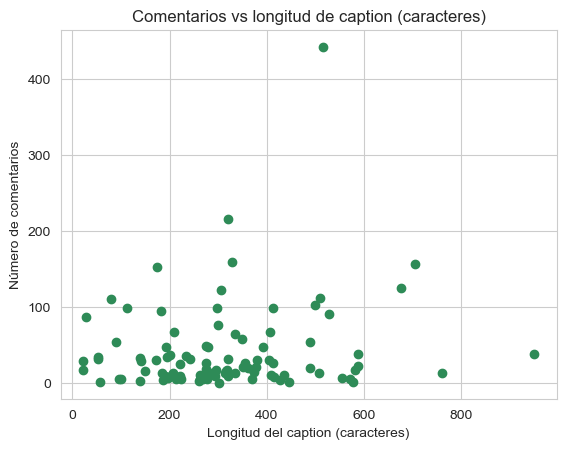

In [297]:
# 5. Comentarios vs longitud de caption (caracteres)
plt.figure()
plt.scatter(posts['char_len_caption'], posts['comment_count'])
plt.xlabel('Longitud del caption (caracteres)')
plt.ylabel('Número de comentarios')
plt.title('Comentarios vs longitud de caption (caracteres)')
plt.show()

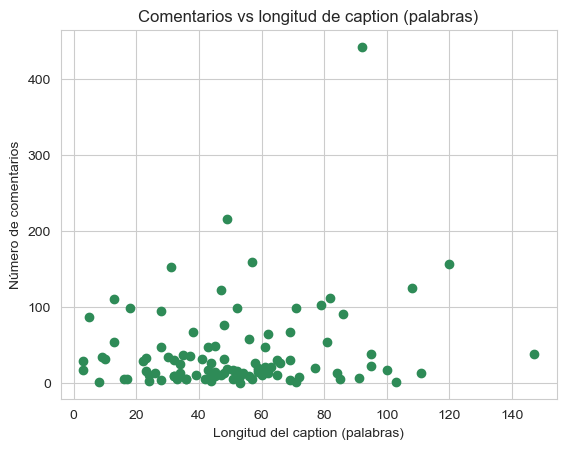

In [298]:
# 6. Comentarios vs longitud de caption (palabras)
plt.figure()
plt.scatter(posts['word_len_caption'], posts['comment_count'])
plt.xlabel('Longitud del caption (palabras)')
plt.ylabel('Número de comentarios')
plt.title('Comentarios vs longitud de caption (palabras)')
plt.show()

<Axes: >

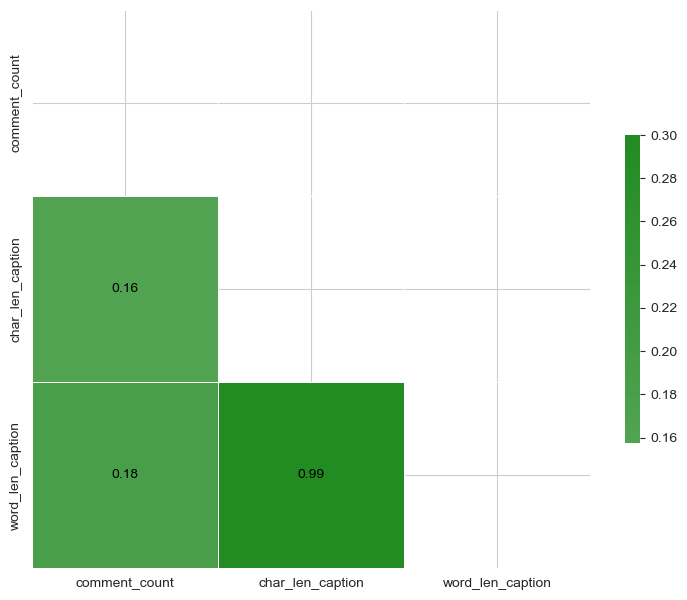

In [299]:
# 7. Matriz de correlación
corr = posts[['comment_count', 'char_len_caption', 'word_len_caption']].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(9, 8))

# Generate a custom diverging colormap
cmap = sns.light_palette("#228B22", n_colors=256, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            annot=True,
            fmt='.2f',
            annot_kws={"size":10, "color":"black"}
            )

In [300]:
df = df.dropna(subset=['comment_text']).copy()
df['text_clean'] = (
    df['comment_text']
    .str.lower()
    .str.replace(r'http\S+', '', regex=True)    # quitar URLs
    .str.replace(r'[@#]\w+', '', regex=True)    # quitar menciones/hashtags
    .str.replace(r'[^\w\s]', '', regex=True)    # quitar puntuación
)

In [301]:
df['hour']      = df['timestamp'].dt.hour
df['weekday']   = df['timestamp'].dt.day_name(locale='es_ES')
df['date']      = df['timestamp'].dt.date


<Axes: title={'center': 'Comentarios por día'}, xlabel='weekday'>

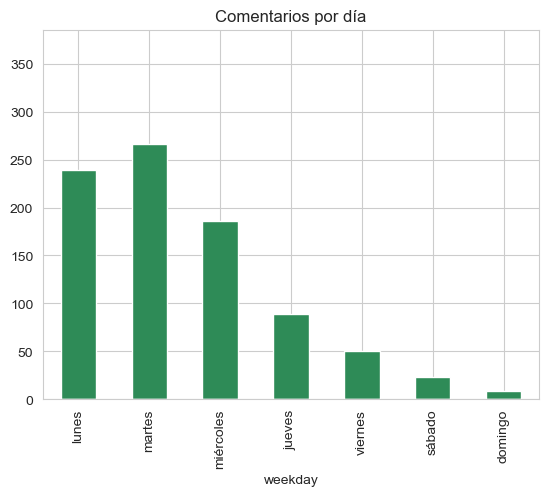

In [302]:
# Comentarios por hora
df.groupby('hour').size().plot.bar(title='Comentarios por hora')
# Comentarios por día de la semana
df.groupby('weekday').size().reindex(
    ['lunes','martes','miércoles','jueves','viernes','sábado','domingo']
).plot.bar(title='Comentarios por día')


In [303]:
df['char_len'] = df['text_clean'].str.len()
df['word_len'] = df['text_clean'].str.split().str.len()
df[['char_len','word_len']].describe()

,char_len,word_len
count,4076.000000,4076.000000
mean,104.581943,18.458538
std,157.342820,27.189740
min,0.000000,0.000000
25%,18.000000,3.000000
50%,54.000000,10.000000
75%,122.000000,22.000000
max,1717.000000,308.000000


In [304]:
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('stopwords')
spanish_stop = stopwords.words('spanish')
extra_stops = ['san', 'isidro']
custom_stop = set(spanish_stop + extra_stops)
custom_stop = list(custom_stop)


vec = CountVectorizer(stop_words=custom_stop, min_df=10, token_pattern=r"\b\w+\b")
X   = vec.fit_transform(df['text_clean'])
freqs = pd.Series(X.sum(axis=0).A1, index=vec.get_feature_names_out())
freqs.sort_values(ascending=False).head(20)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\peric\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


siempre      318
si           304
hola         285
cómo         247
gracias      234
hace         219
q            214
equipo       213
calles       199
veredas      195
cada         182
vecinos      180
saludos      178
reclamo      173
municipio    152
calle        149
bien         144
obras        141
msi          139
meses        139
dtype: int64

In [305]:
freqs_filtered = freqs.sort_values(ascending=False)


In [306]:
freqs_filtered = freqs_filtered[freqs_filtered < 213]

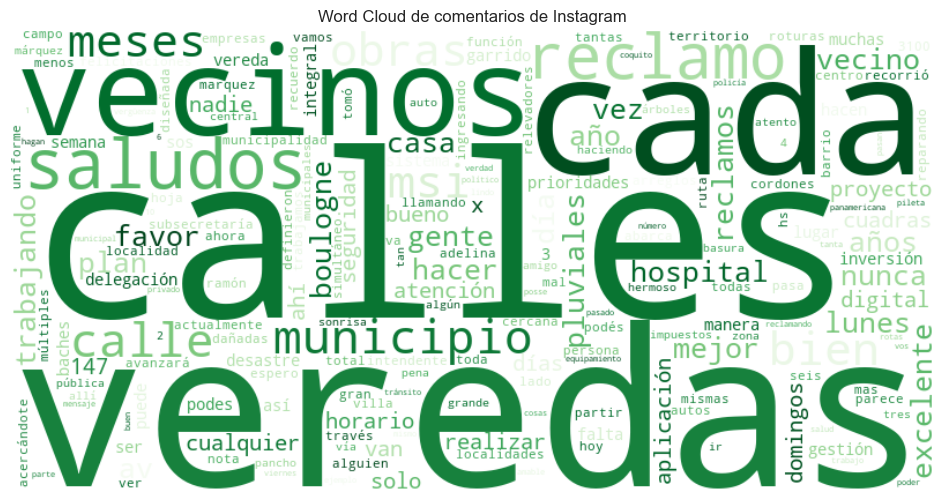

In [307]:
from wordcloud import WordCloud

# Suponiendo que 'freqs' ya está calculado como Series palabra → frecuencia
wc = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='Greens'
).generate_from_frequencies(freqs_filtered.to_dict())

# Mostrar el word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud de comentarios de Instagram")
plt.show()


In [308]:
df_vec = pd.DataFrame(
    X.toarray(),
    columns=vec.get_feature_names_out()
).assign(hour=df['hour'].values)

# Sumar por hora
by_hour = df_vec.groupby('hour').sum()

Text(52.722222222222214, 0.5, 'Palabra')

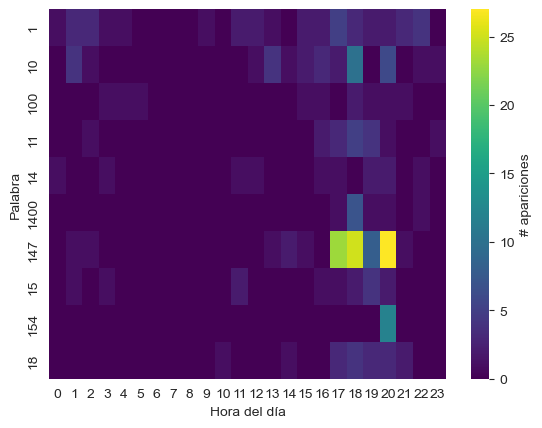

In [309]:
top10 = freqs.head(10).index
sns.heatmap(by_hour[top10].T, cmap='viridis', cbar_kws={'label':'# apariciones'})
plt.xlabel('Hora del día'); plt.ylabel('Palabra')

In [310]:
freqs_filtered = freqs_filtered[freqs_filtered > 100]

In [311]:
for term in freqs_filtered.index:
    df[f'has_{term}'] = df['text_clean'].str.contains(rf'\b{term}\b').astype(int)
corr = df[[f'has_{t}' for t in freqs_filtered.index] + ['hour']].corr()
print(corr['hour'].sort_values())

has_casa         -0.071647
has_año          -0.044006
has_hacer        -0.019242
has_años         -0.010238
has_gente        -0.009911
has_favor        -0.009067
has_día          -0.003040
has_bien         -0.000187
has_calle         0.000423
has_meses         0.022777
has_hospital      0.023578
has_boulogne      0.029242
has_nunca         0.031810
has_veredas       0.037223
has_mejor         0.045198
has_cada          0.045233
has_vecinos       0.045493
has_municipio     0.047765
has_calles        0.048241
has_vez           0.052716
has_obras         0.059328
has_av            0.065353
has_trabajando    0.072959
has_reclamo       0.079048
has_pluviales     0.079502
has_reclamos      0.080315
has_plan          0.100747
has_msi           0.123059
has_saludos       0.123561
hour              1.000000
Name: hour, dtype: float64


## Análisis de sentimiento con SaBERT

In [312]:
sia = SentimentIntensityAnalyzer()
df['sentiment'] = df['comment_text'].fillna('').apply(lambda x: sia.polarity_scores(x)['compound'])

In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4076 entries, 0 to 4078
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   post_id              4076 non-null   int64              
 1   comment_id           4076 non-null   int64              
 2   comment_text         4076 non-null   object             
 3   like_count           4076 non-null   int64              
 4   timestamp            4076 non-null   datetime64[ns, UTC]
 5   post_caption         4076 non-null   object             
 6   post_time            4076 non-null   object             
 7   post_comments_count  4076 non-null   int64              
 8   post_likes           4076 non-null   int64              
 9   post_media_type      4076 non-null   object             
 10  post_media_url       4055 non-null   object             
 11  char_len             4076 non-null   int64              
 12  word_len             4076

In [314]:
from transformers import pipeline

sentiment_analyzer = pipeline(
    "sentiment-analysis",
    model="VerificadoProfesional/SaBERT-Spanish-Sentiment-Analysis",
    tokenizer="VerificadoProfesional/SaBERT-Spanish-Sentiment-Analysis"
)

Device set to use cpu


In [315]:
batch_size = 64
sentiment_results = []
for i in range(0, len(df), batch_size):
    batch_texts = df['text_clean'].iloc[i:i+batch_size].tolist()
    sentiment_results.extend(sentiment_analyzer(batch_texts))

# 4. Añade columnas al DataFrame
df['sentiment_label'] = [res['label'] for res in sentiment_results]
df['sentiment_score'] = [res['score'] for res in sentiment_results]

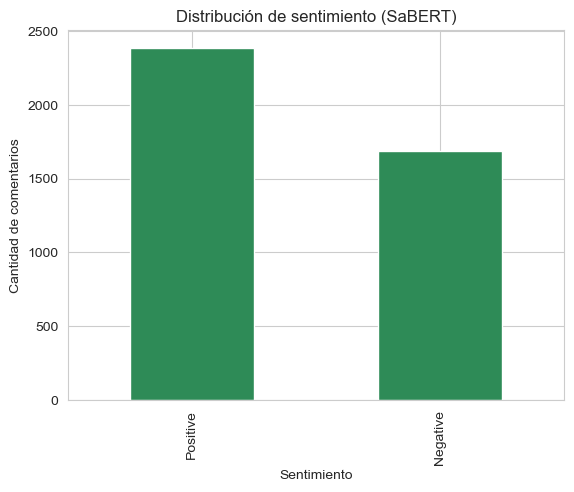

In [316]:
# 5. Visualiza la distribución de etiquetas
plt.figure()
df['sentiment_label'].value_counts().plot.bar()
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de comentarios')
plt.title('Distribución de sentimiento (SaBERT)')
plt.show()

<Figure size 1000x500 with 0 Axes>

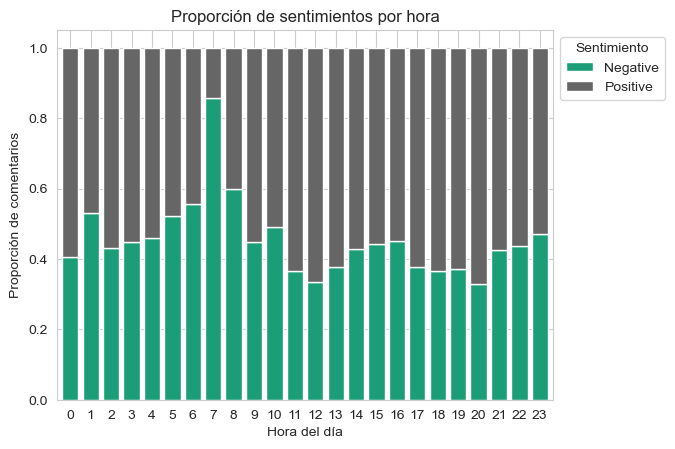

In [355]:
sent_hour = pd.crosstab(df['hour'], df['sentiment_label'])
sent_hour_norm = sent_hour.div(sent_hour.sum(axis=1), axis=0)  # opcional: proporciones

plt.figure(figsize=(10,5))
sent_hour_norm.plot(kind='bar', stacked=True, width=0.8, colormap='Dark2')
plt.title('Proporción de sentimientos por hora')
plt.xlabel('Hora del día')
plt.xticks(rotation=0)
plt.ylabel('Proporción de comentarios')
plt.legend(title='Sentimiento', bbox_to_anchor=(1,1))
plt.show()

In [365]:
df.query("hour == 7")['comment_text'].to_list()

['The one and only',
 'Vivo en el barrio de Acassuso y hace años hago denuncias por el ruido de una cámara de seguridad que no me deja dormir y nadie me ayuda! Tengo un hijo recién nacido. Es un ruido que hace mal a la salud y a nadie le importa!!! Esto me pasa desde la pandemia con el frío. Una de las veces que llame  a hacer la denuncia la chica que me  atendió y trabaja en la municipalidad me dijo te vas a tener que mudar de casa. Nadie va a ir.',
 'Vivo en el barrio de Acassuso y hace años hago denuncias por el ruido de una cámara de seguridad que no me deja dormir y nadie me ayuda! Tengo un hijo recién nacido. Es un ruido que hace mal a la salud y a nadie le importa!!! Esto me pasa desde la pandemia con el frío. Una de las veces que llame  a hacer la denuncia la chica que me  atendió y trabaja en la municipalidad me dijo te vas a tener que mudar de casa. Nadie va a ir.',
 '@sanisidrogob y para q gastaron en lonas nuevas??? Por q en todos los xampos se pusieron lonas nuevas,y le pr

<Figure size 1000x500 with 0 Axes>

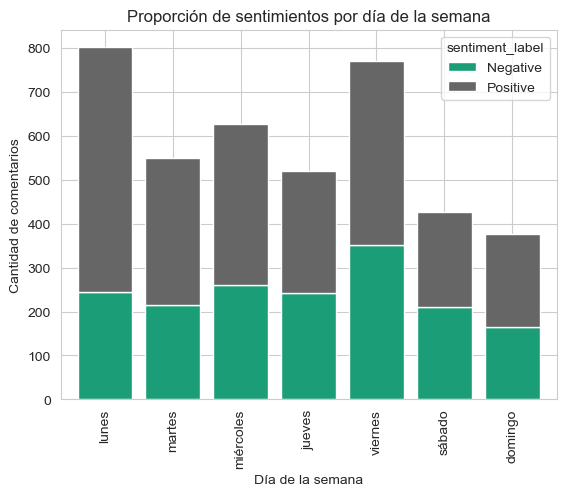

In [318]:
df['weekday'] = df['timestamp'].dt.day_name(locale='es_ES').str.lower()
order = ['lunes','martes','miércoles','jueves','viernes','sábado','domingo']
sent_wday = pd.crosstab(df['weekday'], df['sentiment_label']).reindex(order)

plt.figure(figsize=(10,5))
sent_wday.plot(kind='bar', stacked=True, width=0.8, colormap="Dark2")
plt.title('Proporción de sentimientos por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Cantidad de comentarios')
plt.show()

<Figure size 800x400 with 0 Axes>

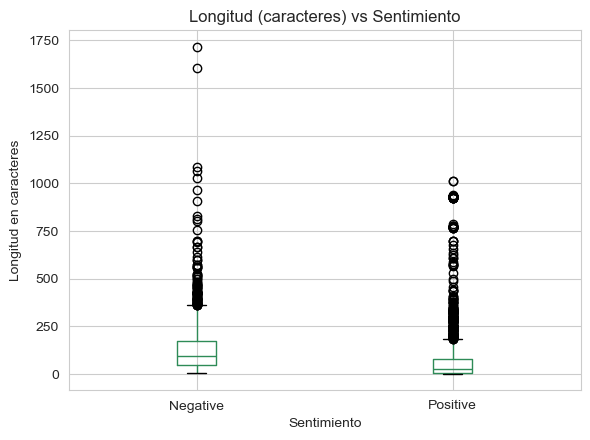

In [319]:
plt.figure(figsize=(8,4))
df.boxplot(column='char_len', by='sentiment_label')
plt.title('Longitud (caracteres) vs Sentimiento')
plt.suptitle('')
plt.xlabel('Sentimiento')
plt.ylabel('Longitud en caracteres')
plt.show()

<Figure size 800x400 with 0 Axes>

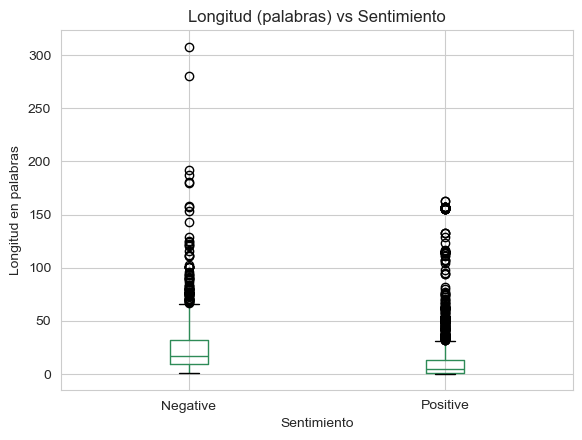

In [320]:
plt.figure(figsize=(8,4))
df.boxplot(column='word_len', by='sentiment_label')
plt.title('Longitud (palabras) vs Sentimiento')
plt.suptitle('')
plt.xlabel('Sentimiento')
plt.ylabel('Longitud en palabras')
plt.show()

## Etiquetado provisional

In [321]:
keywords = [
    "reclamo", "no funciona", "fallo", "problema", "demora",
    "error", "queja", "no sirve"
]

# 2. Aplica una regla simple
df['is_complaint_rule'] = (
    df['text_clean']
      .str.contains("|".join(keywords), case=False, regex=True)
)

In [322]:
from sklearn.feature_extraction.text import CountVectorizer

# Configura n-grams
vect = CountVectorizer(
    stop_words=custom_stop,
    ngram_range=(1,2),
    min_df=5
)
X = vect.fit_transform(df['text_clean'])
terms = vect.get_feature_names_out()

# Construye un DataFrame con conteo por comentario
tdm = pd.DataFrame(
    X.toarray(),
    index=df.index,            # <— aquí
    columns=terms
)

grp = df['is_complaint_rule']
freq_complaint    = tdm[grp].sum().sort_values(ascending=False)
freq_noncomplaint = tdm[~grp].sum().sort_values(ascending=False)


In [323]:
top20_rec   = freq_complaint.head(20)
top20_no_rec= freq_noncomplaint.head(20)

In [324]:
# Suavizado +1 para evitar división por cero
f_rec   = freq_complaint   + 1
f_nrec  = freq_noncomplaint+ 1

ratio = (f_rec / f_rec.sum()) / (f_nrec / f_nrec.sum())
top_ratio = ratio.sort_values(ascending=False).head(20)


In [325]:
from sklearn.feature_selection import chi2

chi2_scores, p_vals = chi2(X, grp.astype(int))
chi2_df = pd.DataFrame({
    'term': terms,
    'chi2': chi2_scores,
    'p': p_vals
}).sort_values('chi2', ascending=False)

top_chi2 = chi2_df.head(20)


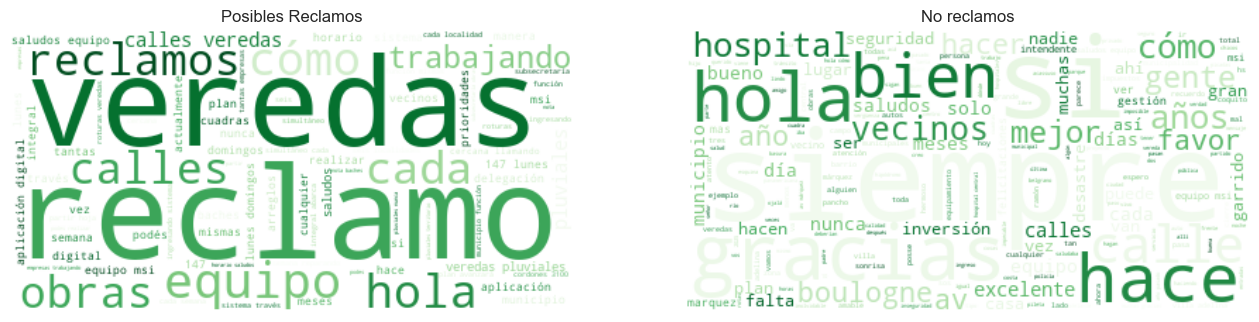

In [326]:
# WordCloud de “reclamos”
wc_rec = WordCloud(background_color='white', colormap='Greens').generate_from_frequencies(
    freq_complaint.to_dict()
)
# WordCloud de no-reclamos
wc_nrec = WordCloud(background_color='white', colormap='Greens').generate_from_frequencies(
    freq_noncomplaint.to_dict()
)

fig, axes = plt.subplots(1,2, figsize=(16,6))
axes[0].imshow(wc_rec,  interpolation='bilinear'); axes[0].axis('off'); axes[0].set_title('Posibles Reclamos')
axes[1].imshow(wc_nrec, interpolation='bilinear'); axes[1].axis('off'); axes[1].set_title('No reclamos')
plt.show()


In [327]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(
    n_components=6,
    random_state=42
)
lda.fit(X)

# Mostrar top palabras por tópico
def top_words(model, feature_names, n=10):
    for i, comp in enumerate(model.components_):
        terms = [feature_names[idx] for idx in comp.argsort()[-n:]]
        print(f"Tópico {i}: {', '.join(terms)}")

top_words(lda, terms)

Tópico 0: calles, excelente, vecinos, gente, hace, años, hacer, calle, si, siempre
Tópico 1: equipamiento, central, plan, total, av, hs, marquez, año, inversión, hospital
Tópico 2: horas, campo, lindo, muchas gracias, bueno, favor, cómo, muchas, hola, gracias
Tópico 3: falta, vecino, felicitaciones, sos, mejor, municipalidad, si, gestión, bien, hace
Tópico 4: hola, veredas pluviales, calles veredas, pluviales, calles, cada, trabajando, obras, equipo, veredas
Tópico 5: msi, centro, atención, reclamo, equipo, saludos, cómo, hola, reclamos, podés


In [328]:
df.query("comment_text.str.contains('reclamo')")

,post_id,comment_id,comment_text,like_count,timestamp,post_caption,post_time,post_comments_count,post_likes,post_media_type,...,has_favor,has_reclamos,has_av,has_día,has_pluviales,has_casa,sentiment,sentiment_label,sentiment_score,is_complaint_rule
229,17929428327031987,18040237946445001,Hace un año y medio tengo hecho un reclamo x v...,0,2025-04-22 11:20:27+00:00,¡Felices Pascuas de Resurrección!\n\nAcompañam...,2025-04-20T13:00:35+0000,5,338,CAROUSEL_ALBUM,...,0,0,0,0,0,1,0.0000,Negative,0.998951,True
286,18367533100134754,18288597019149040,Hace un año y medio tengo hecho un reclamo x v...,0,2025-04-22 11:30:17+00:00,Más de 1.500 vecinos participaron del encuentr...,2025-04-17T00:25:23+0000,107,503,VIDEO,...,0,0,0,0,0,1,0.0000,Negative,0.998951,True
320,18367533100134754,17983358390674284,@pablofontanet.si hice muchísimos reclamos de ...,1,2025-04-17 14:44:16+00:00,Más de 1.500 vecinos participaron del encuentr...,2025-04-17T00:25:23+0000,107,503,VIDEO,...,0,1,0,0,0,1,-0.6553,Negative,0.999691,True
388,18098229253530340,18045617981139771,Vereda o calzada en malas condiciones por obra...,0,2025-04-23 17:53:17+00:00,Así es el proceso de repavimentación que estam...,2025-04-16T15:10:48+0000,15,160,VIDEO,...,0,1,0,0,0,0,-0.5574,Negative,0.999017,True
389,18098229253530340,18347834704154544,Hace un año y medio tengo hecho un reclamo x v...,0,2025-04-22 11:34:04+00:00,Así es el proceso de repavimentación que estam...,2025-04-16T15:10:48+0000,15,160,VIDEO,...,0,0,0,0,0,1,0.0000,Negative,0.998951,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3852,18029537345250630,18135021100376038,Nunca atienden ni acuden a los reclamos durant...,1,2025-01-12 02:55:47+00:00,Te compartimos más información sobre el Plan d...,2025-01-11T15:40:27+0000,112,367,CAROUSEL_ALBUM,...,0,1,0,0,0,0,0.0000,Negative,0.999536,True
3863,18029537345250630,18282368272220434,@dani_bourbon te agradezco tu comentario pero ...,2,2025-01-11 18:27:23+00:00,Te compartimos más información sobre el Plan d...,2025-01-11T15:40:27+0000,112,367,CAROUSEL_ALBUM,...,0,1,0,0,0,0,-0.2960,Positive,0.969904,True
3864,18029537345250630,18088859704535889,@cpmiranda07 Escribí a espaciopublico@sanisidr...,0,2025-01-11 18:08:47+00:00,Te compartimos más información sobre el Plan d...,2025-01-11T15:40:27+0000,112,367,CAROUSEL_ALBUM,...,0,0,0,0,0,0,0.0000,Negative,0.999320,True
3921,18342298177147579,17918539310935802,"@mabparravicini Hola, ¿cómo estás? Actualmente...",0,2025-01-07 17:11:28+00:00,¡Feliz día de Reyes! Que la magia y la alegría...,2025-01-05T15:40:56+0000,6,162,IMAGE,...,0,0,0,0,0,0,-0.4019,Positive,0.998471,True


In [339]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4076 entries, 0 to 4078
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   post_id              4076 non-null   int64              
 1   comment_id           4076 non-null   int64              
 2   comment_text         4076 non-null   object             
 3   like_count           4076 non-null   int64              
 4   timestamp            4076 non-null   datetime64[ns, UTC]
 5   post_caption         4076 non-null   object             
 6   post_time            4076 non-null   object             
 7   post_comments_count  4076 non-null   int64              
 8   post_likes           4076 non-null   int64              
 9   post_media_type      4076 non-null   object             
 10  post_media_url       4055 non-null   object             
 11  char_len             4076 non-null   int64              
 12  word_len             4076

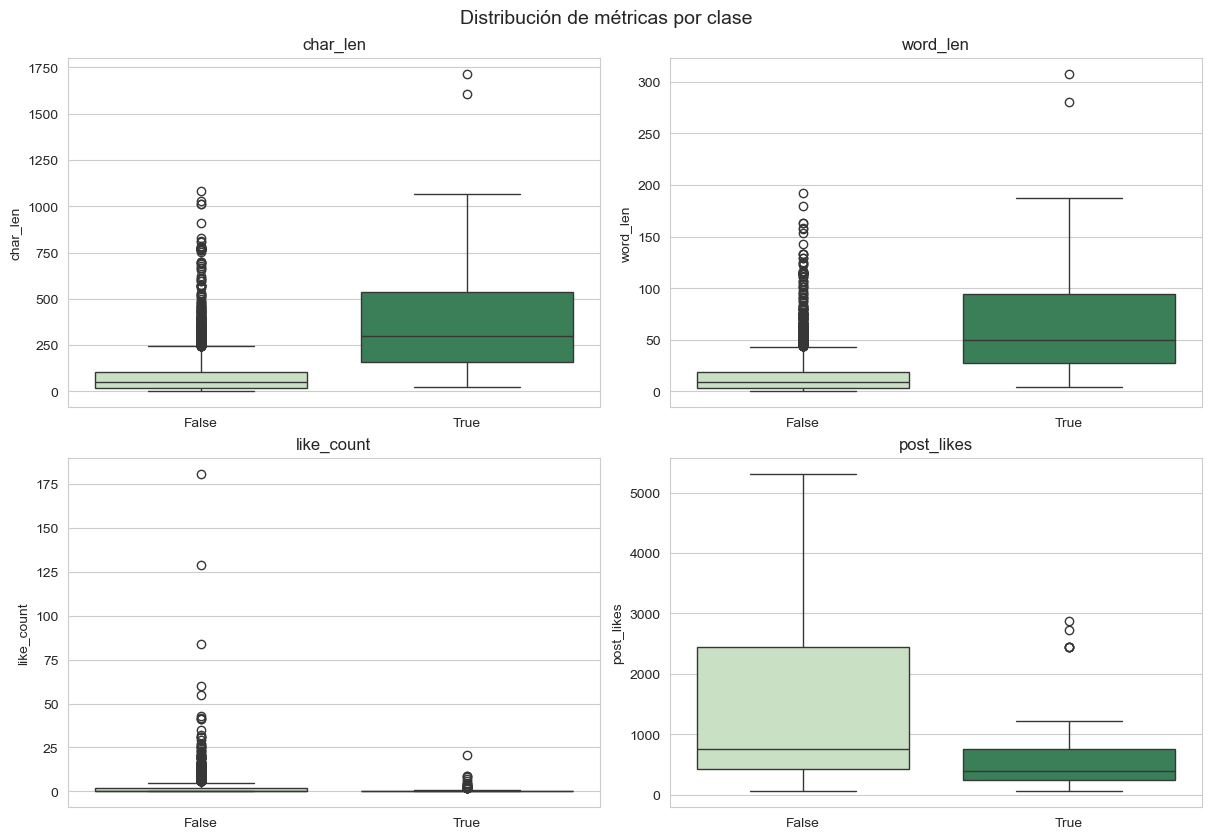

In [349]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8), constrained_layout=True)
num_cols = ['char_len', 'word_len', 'like_count', 'post_likes']

for ax, col in zip(axs.flatten(), num_cols):
    sns.boxplot(data=df, y=col, x='is_complaint_rule',
                palette=['#C7E4C0', '#2E8B57'], ax=ax)
    ax.set_xlabel('')          # limpia etiqueta
    ax.set_title(col)

plt.suptitle('Distribución de métricas por clase', y=1.03, fontsize=14)
plt.show()

In [338]:
df.query("post_likes > 4000")

,post_id,comment_id,comment_text,like_count,timestamp,post_caption,post_time,post_comments_count,post_likes,post_media_type,...,has_favor,has_reclamos,has_av,has_día,has_pluviales,has_casa,sentiment,sentiment_label,sentiment_score,is_complaint_rule
2494,18493669975008278,18069162331733688,Mi amor!!! Un señorazo! Se me cayó la cartera ...,0,2025-04-06 00:41:10+00:00,"A 16 años de su partida, rendimos homenaje a A...",2025-02-17T11:26:51+0000,445,5313,IMAGE,...,0,0,0,0,0,0,0.6083,Positive,0.995188,False
2495,18493669975008278,17878478097184990,👏👏👏👏 hacia la procuración en san Isidro y siem...,0,2025-03-28 00:29:30+00:00,"A 16 años de su partida, rendimos homenaje a A...",2025-02-17T11:26:51+0000,445,5313,IMAGE,...,0,0,0,0,0,0,0.0000,Positive,0.999745,False
2496,18493669975008278,18042880403597146,Único.,0,2025-02-28 16:06:17+00:00,"A 16 años de su partida, rendimos homenaje a A...",2025-02-17T11:26:51+0000,445,5313,IMAGE,...,0,0,0,0,0,0,0.0000,Positive,0.999348,False
2497,18493669975008278,18059160187991725,"Hay que trabajar sobre el perverso Garantismo,...",0,2025-02-27 22:22:32+00:00,"A 16 años de su partida, rendimos homenaje a A...",2025-02-17T11:26:51+0000,445,5313,IMAGE,...,0,0,0,0,0,0,0.0000,Negative,0.999523,False
2498,18493669975008278,18054660164120027,"QEPD, no lo conoci, leí los comentarios, un gr...",0,2025-02-26 15:27:47+00:00,"A 16 años de su partida, rendimos homenaje a A...",2025-02-17T11:26:51+0000,445,5313,IMAGE,...,0,0,0,0,0,0,-0.2960,Negative,0.999504,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2931,18493669975008278,17843555691425298,Lo recuerdo.. saludar a todos y cuidar a la ge...,5,2025-02-17 11:33:04+00:00,"A 16 años de su partida, rendimos homenaje a A...",2025-02-17T11:26:51+0000,445,5313,IMAGE,...,0,0,0,0,0,0,0.0000,Positive,0.999504,False
2932,18493669975008278,18075485050664017,Siempre sonriente y buena energía nos cuidaba ...,17,2025-02-17 11:32:42+00:00,"A 16 años de su partida, rendimos homenaje a A...",2025-02-17T11:26:51+0000,445,5313,IMAGE,...,0,0,0,1,0,0,0.0000,Positive,0.999730,False
2933,18493669975008278,17967983024720257,"Gran ser humano! Siempre querido, siempre reco...",11,2025-02-17 11:32:27+00:00,"A 16 años de su partida, rendimos homenaje a A...",2025-02-17T11:26:51+0000,445,5313,IMAGE,...,0,0,0,0,0,0,0.0000,Positive,0.999556,False
2934,18493669975008278,17966813117843447,Honor y paz querido Aldo! Jamas olvidare sus b...,4,2025-02-17 11:32:14+00:00,"A 16 años de su partida, rendimos homenaje a A...",2025-02-17T11:26:51+0000,445,5313,IMAGE,...,0,0,0,0,0,0,0.5837,Positive,0.999735,False
